In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data set

In [4]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Shape & size

In [5]:
df.shape

(303, 14)

### Information of columns

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Divide data into dependent & independent variable

In [9]:
X=df.drop('target', axis=1)
y=df.target
print("Dependent Variables :", X)
print("Independent Variables :", y)

Dependent Variables :      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     

### Split data into train & test set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
print("Train Shape", X_train.shape)
print("Test Shape", X_test.shape)

Train Shape (227, 13)
Test Shape (76, 13)


### Create a Model and Fit the data to model

In [20]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=0,)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Comparing Predicted & Actual Values

In [21]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [22]:
clf.score(X_train,y_train)

1.0

In [23]:
clf.score(X_test,y_test)

0.75

**Test accuracy is low means High variance hence overfitting problem Occure**

### Decision Tree Plot

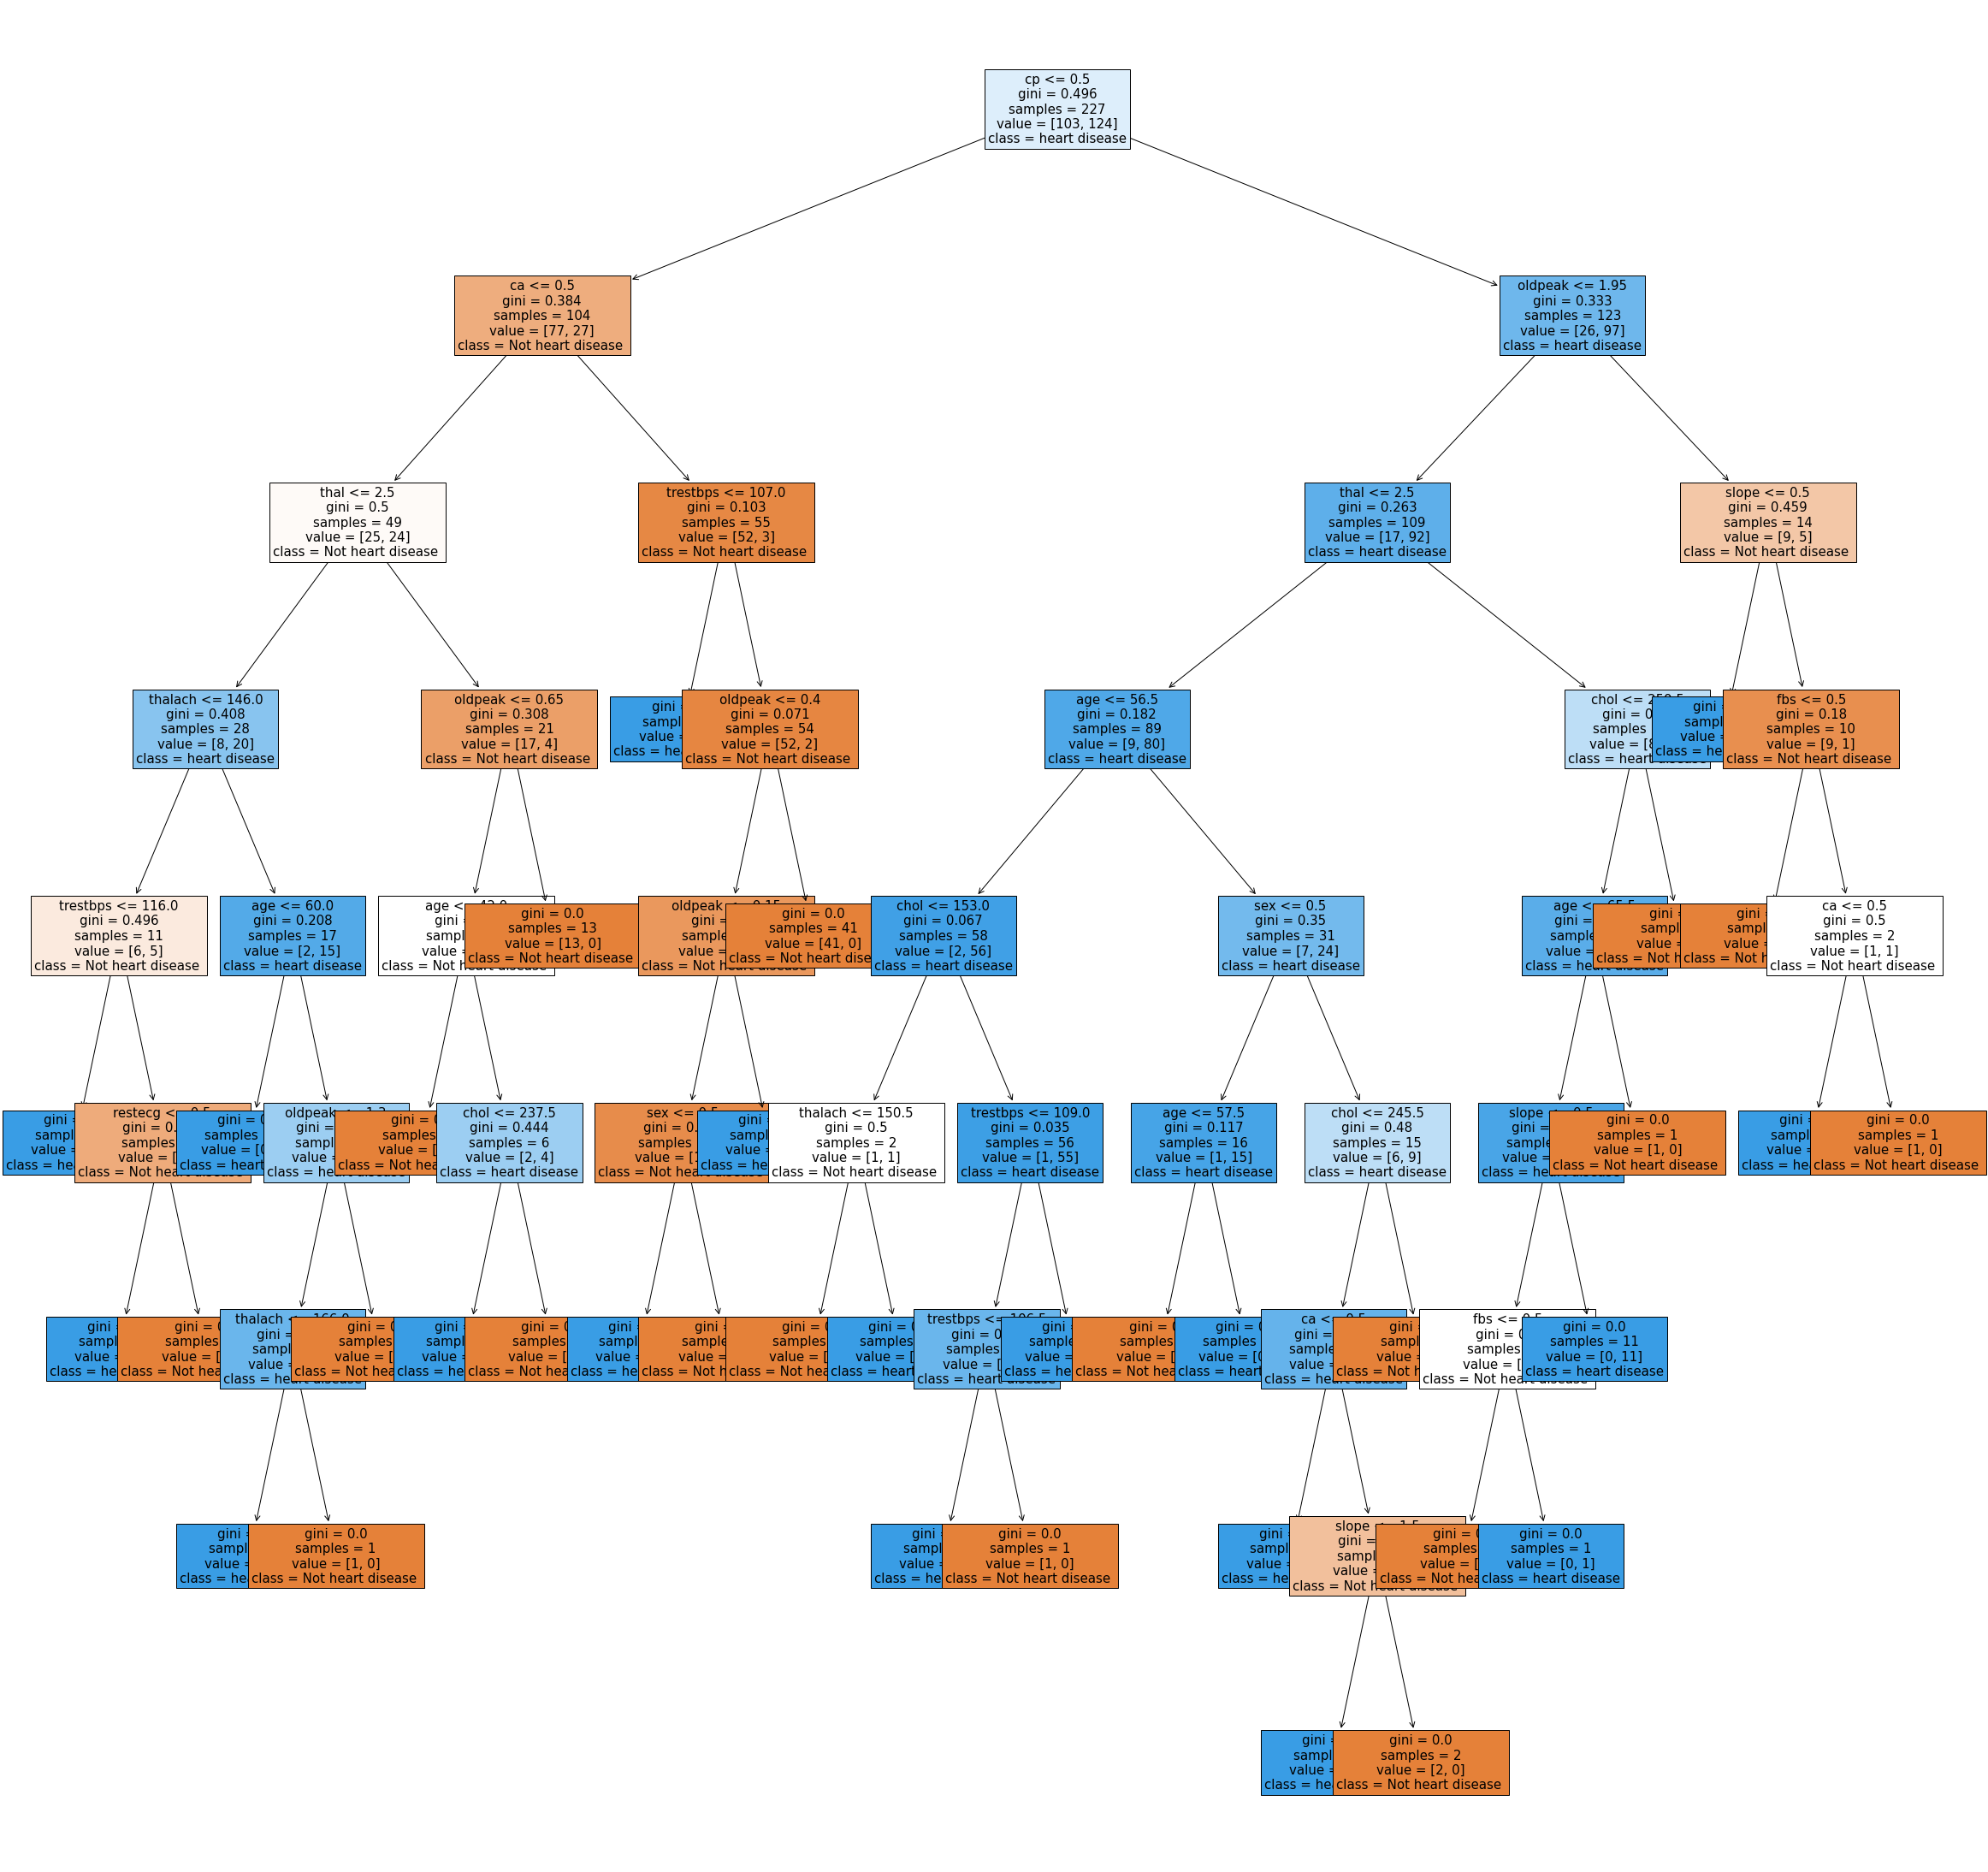

In [37]:
plt.figure(figsize=(40,40))
features=df.columns
classes=['Not heart disease ', 'heart disease']
tree.plot_tree(clf,feature_names=features, class_names=classes, filled=True, fontsize=15)
plt.show;

### Confusion matrix

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf=confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes,
               xticklabels=classes, cmap='Blues',fmt='g')
    plt.tight_layout()
    plt.show();

Train score 1.0
Test score 0.75
Train Confusion matrix


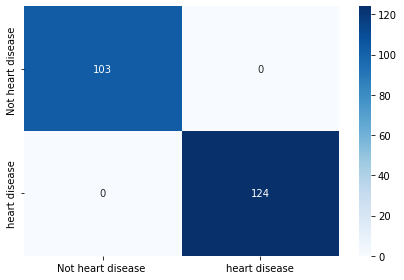

Test Confusion matrix


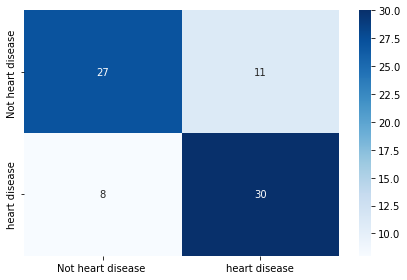

In [48]:
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### Increase test accuracy use Pre-Prunning

In [69]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
params={'max_depth':[2,4,6,8,10,12],
       'min_samples_split':[2,3,4],
       'min_samples_leaf':[1,2]}

In [70]:
clf=tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [71]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [72]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Train score 0.8942731277533039
Test score 0.75
Train Confusion matrix


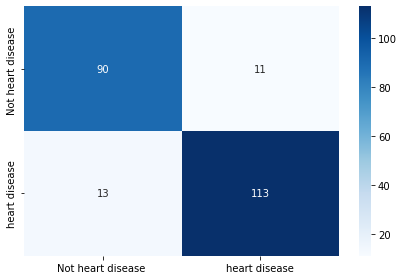

Test Confusion matrix


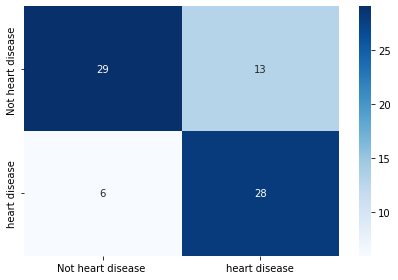

In [73]:
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### Pre-Prunning is not solved problem yet test accuracy is low, in such case use Post-Prunning

In [74]:
path=clf.cost_complexity_pruning_path(X_train, y_train)
ccp,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)
print('no of alphas ', len(ccp_alphas))

[0.         0.00396476 0.00406642 0.00425338 0.00518269 0.00565617
 0.00587372 0.006971   0.00802148 0.00825991 0.00854359 0.00881057
 0.0105286  0.01090833 0.01159935 0.02001961 0.02039018 0.02591326
 0.02900896 0.04325219 0.13894156]
no of alphas  21


In [75]:
clfs=[]
for ccp_alpha in ccp:
    clf=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

[1.0, 0.9955947136563876, 0.9911894273127754, 0.9823788546255506, 0.973568281938326, 0.9647577092511013, 0.960352422907489, 0.9559471365638766, 0.9515418502202643, 0.947136563876652, 0.9427312775330396, 0.9251101321585903, 0.9074889867841409, 0.9074889867841409, 0.8810572687224669, 0.8546255506607929, 0.8370044052863436, 0.8193832599118943, 0.7665198237885462, 0.7665198237885462, 0.5462555066079295]
[0.75, 0.75, 0.75, 0.7631578947368421, 0.7631578947368421, 0.7763157894736842, 0.7763157894736842, 0.7763157894736842, 0.8026315789473685, 0.8026315789473685, 0.8026315789473685, 0.7894736842105263, 0.7763157894736842, 0.7763157894736842, 0.7894736842105263, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.7368421052631579, 0.7368421052631579, 0.5394736842105263]


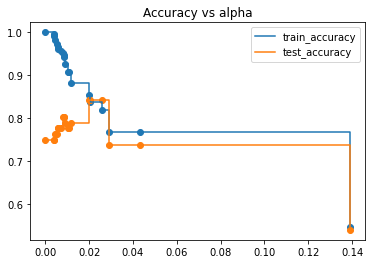

In [76]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
print(train_acc)
print(test_acc)
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8810572687224669
Test score 0.7894736842105263
Train Confusion matrix


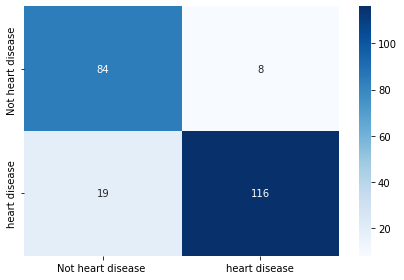

Test Confusion matrix


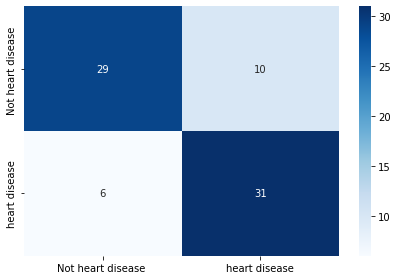

In [77]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')